In [2]:
import sys
import numpy as np
sys.path.insert(0, r"D:\Godis\Projects\Markup-Tool\result-inference-service\core")
from infer_multi_recognition import infer_multi_recognition

In [3]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [4]:
def rect_dict_to_arr(rect):
    return rect["x1"], rect["y1"], rect["x2"], rect["y2"]

In [5]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

with open(r"D:\Godis\Data\result.json", "r") as f:
    results = json.load(f)

In [6]:
results

[{'url': '55360e6da29645a5dbb7/24cf9ed4fe54eb44c1e349dab70abff8',
  'name': '10.bmp',
  'markup': {'status': 'SUCCESS',
   'rectangles': [{'x1': 21.5, 'y1': 45, 'x2': 46.5, 'y2': 59},
    {'x1': 67, 'y1': 45.25, 'x2': 89.75, 'y2': 57.25}]}},
 {'url': '55360e6da29645a5dbb7/b3381e51ab9af6f177c7ec498e40bbab',
  'name': '8.bmp',
  'markup': {'status': 'SUCCESS',
   'rectangles': [{'x1': 20, 'y1': 39.25, 'x2': 39.25, 'y2': 53.75},
    {'x1': 53.75, 'y1': 36.5, 'x2': 73.5, 'y2': 50.25}]}},
 {'url': '55360e6da29645a5dbb7/33f85aefd1ff84568530072d51f0385e',
  'name': '9.bmp',
  'markup': {'status': 'SUCCESS',
   'rectangles': [{'x1': 20.25, 'y1': 31.75, 'x2': 40.25, 'y2': 44.25},
    {'x1': 58, 'y1': 30.25, 'x2': 75.5, 'y2': 41.75}]}},
 {'url': '55360e6da29645a5dbb7/10b478a69fd78960585686a69475c923',
  'name': '1.bmp',
  'markup': {'status': 'SUCCESS',
   'rectangles': [{'x1': 18.25, 'y1': 47, 'x2': 34.75, 'y2': 56.75},
    {'x1': 53.25, 'y1': 45.25, 'x2': 71.75, 'y2': 57}]}},
 {'url': '55360e6

In [7]:
infer_multi_recognition(results)

{'10.bmp': [[66.25, 45.375, 83.875, 54.25], [25.0, 48.25, 43.0, 55.25]],
 '8.bmp': [[53.625, 37.5, 73.25, 48.5], [18.75, 41.5, 36.75, 50.5]],
 '9.bmp': [[20.75, 31.5, 39.25, 42.75], [58.75, 30.0, 77.875, 42.375]],
 '1.bmp': [[17.75, 47.0, 34.75, 56.75], [54.0, 46.25, 70.875, 54.25]],
 '5.bmp': [[25.375, 39.625, 43.875, 48.625], [66.5, 38.0, 84.5, 48.25]],
 '3.bmp': [[15.5, 43.0, 34.75, 54.25], [51.625, 39.875, 71.875, 50.75]],
 '4.bmp': [[3.75, 37.75, 24.5, 51.75], [43.875, 36.125, 67.25, 47.875]],
 '6.bmp': [[3.75, 42.875, 20.5, 52.875], [40.875, 40.5, 64.5, 49.625]],
 '7.bmp': [[15.5, 40.75, 31.75, 51.5], [52.625, 37.25, 70.5, 48.625]],
 '2.bmp': [[21.0, 40.125, 43.125, 49.5], [64.75, 38.75, 84.5, 49.5]]}

In [7]:
from glob import glob
images = {
    path.split("\\")[-1]: mpimg.imread(path)
    for path in glob(r"D:\Godis\Data\markup-tool-orl\*.bmp")
}

In [21]:
image_results = { img_name: [] for img_name in images.keys() }

In [9]:
np.array([[1, 2], [4, 5]]).tolist()

[[1, 2], [4, 5]]

In [22]:
for r in results:
    rect_dict_to_arr
    rects = r["markup"]["rectangles"]
    rect_groups = [rect_dict_to_arr(r_) for r_ in rects]
    
    image_results[r["name"]].append(rect_groups)

In [23]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [25]:
import matplotlib.patches as patches

def plot_markup(ax, img, markup):
    get_color = get_cmap(len(markup)+1)

    ax.imshow(img, cmap="gray")

    for i, rects in enumerate(markup):
        c = get_color(i)
        for r in rects:
            w = r[2] - r[0]
            h = r[3] - r[1]
            rect = patches.Rectangle((r[0], r[1]), w, h, linewidth=1, edgecolor=c, facecolor="none")
            ax.add_patch(rect)

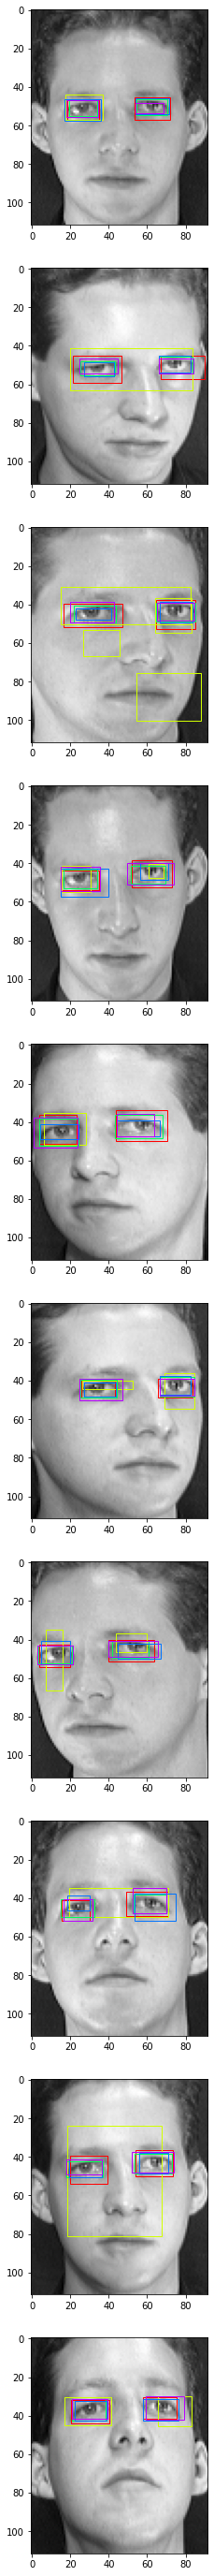

In [26]:
fig, axs = plt.subplots(len(images), figsize=(5, 50))
for i, (img_name, markup) in enumerate(image_results.items()):
    plot_markup(axs[i], images[img_name], markup)

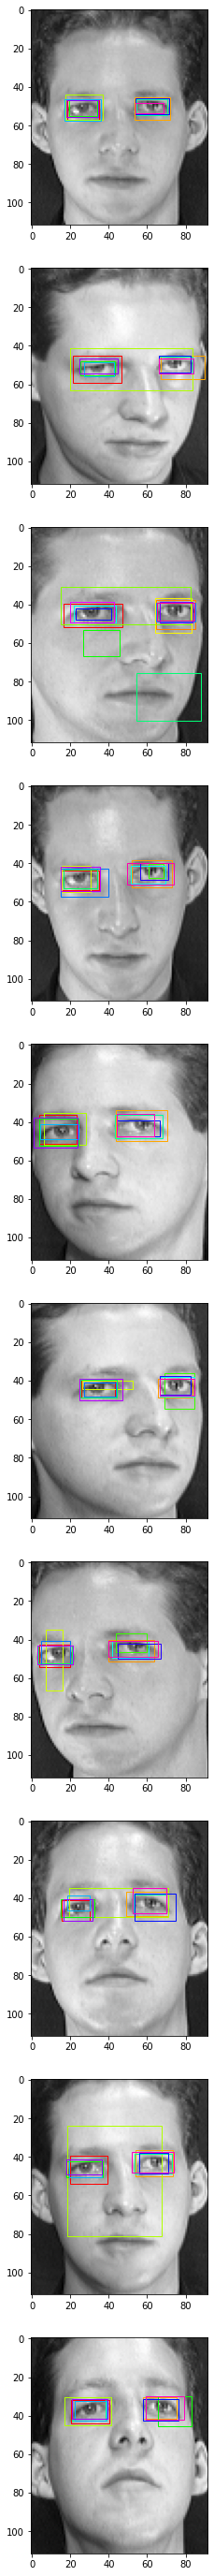

In [27]:
fig, axs = plt.subplots(len(images), figsize=(5, 50))
for i, (img_name, markup) in enumerate(image_results.items()):
    rects = []
    for r in markup:
        rects += r
    rects = np.array(rects)
    
    clusters = dbscan_markup(rects)
    
    new_rects = []
    for j in range(ax(clusters)+1):
        mask = clusters == j
        new_rects.append(np.mean(rects[mask], axis=0))

    groups = list(map(lambda x: [x], rects))
    plot_markup(axs[i], images[img_name], groups)

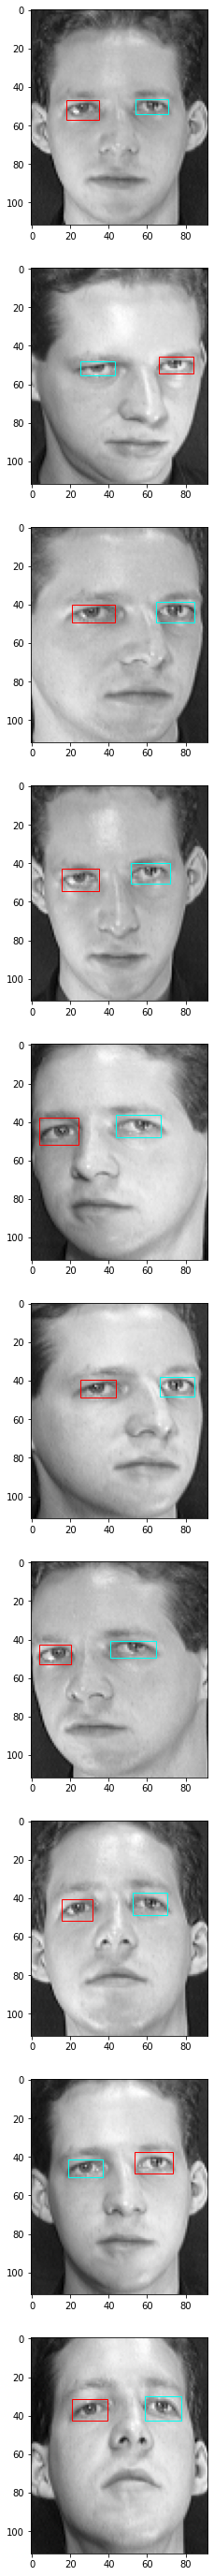

In [31]:
fig, axs = plt.subplots(len(images), figsize=(5, 50))
for i, (img_name, markup) in enumerate(image_results.items()):
    rects = []
    for r in markup:
        rects += r
    
    inferred_rects = infer_multi_recognition(rects)

    groups = np.array(list(map(lambda r: [r], inferred_rects)))
        
    plot_markup(axs[i], images[img_name], groups)

In [190]:
def infer_multi_recognition(markup):
    rects = []
    for _rects in markup:
        for r in _rects:
            rects.append([r["x1"], r["y1"], r["x2"], r["y2"]])

    clusters = dbscan_markup(rects)
    filtered_rects = []
    for j in range(max(clusters) + 1):
        mask = clusters == j
        filtered_rects.append(np.mean(rects[mask], axis=0))
        
    return list(map(lambda r: [{"x1":r[0], "y1": r[1], "x2":r[2], "y2": r[3]}], filtered_rects))